In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [18]:
#!g1.1
#%pip install tensorboardX

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorboardX from https://files.pythonhosted.org/packages/44/71/f3e7c9b2ab67e28c572ab4e9d5fa3499e0d252650f96d8a3a03e26677f53/tensorboardX-2.6.2.2-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 1.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [77]:
#!g1.1
basic_path = '/content/drive/MyDrive/Colab Notebooks' # colab
basic_path = '' # local

import sys
import os
import torch
import numpy as np
import torchvision
import cv2
import matplotlib.pyplot as plt
#sys.path.insert(0, basic_path+'/WDNet-main')
import WDNet

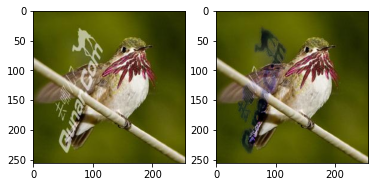

In [25]:
#!g1.1
# pretrained generator test
G = WDNet.generator(3,3)
G.load_state_dict(torch.load(os.path.join(basic_path+'pretrained/WDNet_G.pkl')))

image_path = basic_path+'data_CLWD/test/Watermarked_image/13.jpg'
image = torchvision.io.read_image(image_path)
#image = image[[2,1,0],:,:] # RGB 2 BGR
image = image.float() / 255
image = image.unsqueeze(0)

img_nowm = G(image)

plt.rcParams["figure.figsize"] = (6,4)
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(0).permute(1,2,0))
plt.subplot(1, 2, 2)
plt.imshow(img_nowm[0].squeeze(0).permute(1,2,0).detach().numpy())

In [78]:
#!g1.1
args ={}
args['epoch'] = 1
args['batch_size'] = 16
args['save_dir'] = basic_path+'save_dir'
args['result_dir'] = ''
args['dataset'] = basic_path+'data_CLWD'
args['log_dir'] = basic_path+'save_dir'
args['gpu_mode'] = True
args['input_size'] = 28
args['model_name'] = 'CGAN'
args['lrG'] = 0.0002
args['lrD'] = 0.0002
args['beta1'] = 0.5
args['beta2'] = 0.999
args

{'epoch': 1,
 'batch_size': 16,
 'save_dir': 'save_dir',
 'result_dir': '',
 'dataset': 'data_CLWD',
 'log_dir': 'save_dir',
 'gpu_mode': True,
 'input_size': 28,
 'model_name': 'CGAN',
 'lrG': 0.0002,
 'lrD': 0.0002,
 'beta1': 0.5,
 'beta2': 0.999}

In [79]:
#!g1.1
wdnet = WDNet.WDNet(args)

load success


In [80]:
#!g1.1
wdnet.train()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /tmp/xdg_cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:13<00:00, 39.8MB/s]


training start!!
Epoch: [ 1] [ 100/3750] D_loss: 0.68707311, G_loss: 0.71175563
Epoch: [ 1] [ 200/3750] D_loss: 0.70833445, G_loss: 0.93212873
Epoch: [ 1] [ 300/3750] D_loss: 0.65883601, G_loss: 0.82450342
Epoch: [ 1] [ 400/3750] D_loss: 0.64684415, G_loss: 0.65505314
Epoch: [ 1] [ 500/3750] D_loss: 0.64940357, G_loss: 0.68391484
Epoch: [ 1] [ 600/3750] D_loss: 0.70351452, G_loss: 0.69310755
Epoch: [ 1] [ 700/3750] D_loss: 0.69396770, G_loss: 0.85412413
Epoch: [ 1] [ 800/3750] D_loss: 0.66659331, G_loss: 0.78260267
Epoch: [ 1] [ 900/3750] D_loss: 0.71843404, G_loss: 0.70746654
Epoch: [ 1] [1000/3750] D_loss: 0.65799081, G_loss: 0.97381115
Epoch: [ 1] [1100/3750] D_loss: 0.66745561, G_loss: 0.73850775
Epoch: [ 1] [1200/3750] D_loss: 0.69461530, G_loss: 0.67209125
Epoch: [ 1] [1300/3750] D_loss: 0.67993796, G_loss: 0.91373867
Epoch: [ 1] [1400/3750] D_loss: 0.63559955, G_loss: 1.00322342
Epoch: [ 1] [1500/3750] D_loss: 0.79138118, G_loss: 1.00953591
Epoch: [ 1] [1600/3750] D_loss: 0.6727

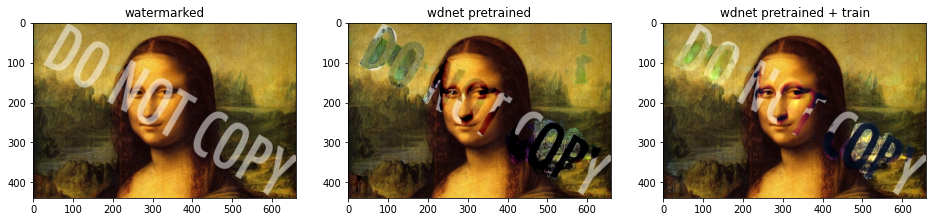

In [82]:
#!g1.1
device='cuda'

G_pre = WDNet.generator(3,3)
G_pre.to(device)
G_pre.load_state_dict(torch.load(os.path.join(basic_path+'pretrained/WDNet_G.pkl')))


G = WDNet.generator(3,3)
G.to(device)
G.load_state_dict(torch.load(os.path.join(basic_path+'save_dir/WDNet_G.pkl')))


image_path = basic_path+'wdnet_test/wm2.jpg'
image = torchvision.io.read_image(image_path)
#image = image[[2,1,0],:,:] # RGB 2 BGR
image = image.float() / 255
image = image.unsqueeze(0)
image = image.to(device)

img_nowm_pre = G_pre(image)
img_nowm = G(image)

plt.rcParams["figure.figsize"] = (16,8)
plt.subplot(1, 3, 1)
plt.gca().set_title('watermarked')
plt.imshow(image.squeeze(0).cpu().permute(1,2,0))
plt.subplot(1, 3, 2)
plt.gca().set_title('wdnet pretrained')
plt.imshow(img_nowm_pre[0].squeeze(0).cpu().permute(1,2,0).detach().numpy())
plt.subplot(1, 3, 3)
plt.gca().set_title('wdnet pretrained + train')
plt.imshow(img_nowm[0].squeeze(0).cpu().permute(1,2,0).detach().numpy())